In [1]:
import pandas as pd

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)
from sklearn.svm import SVR 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

if __name__ == '__main__':
    dataset = pd.read_csv('./data/felicidad_corrupt.csv')
    print(dataset.head(5))

       country  rank  score      high       low       gdp    family    lifexp  \
0       Norway     1  7.537  7.594445  7.479556  1.616463  1.533524  0.796667   
1      Denmark     2  7.522  7.581728  7.462272  1.482383  1.551122  0.792566   
2      Iceland     3  7.504  7.622030  7.385970  1.480633  1.610574  0.833552   
3  Switzerland     4  7.494  7.561772  7.426227  1.564980  1.516912  0.858131   
4      Finland     5  7.469  7.527542  7.410458  1.443572  1.540247  0.809158   

    freedom  generosity  corruption  dystopia  
0  0.635423    0.362012    0.315964  2.277027  
1  0.626007    0.355280    0.400770  2.313707  
2  0.627163    0.475540    0.153527  2.322715  
3  0.620071    0.290549    0.367007  2.276716  
4  0.617951    0.245483    0.382612  2.430182  


In [2]:
#eliminar columnas que no necesitamos

X = dataset.drop(['country', 'score', 'rank'], axis=1)
y = dataset[['score']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [6]:
#estimadores en diccionarios:

estimadores = {
    'SVR' : SVR(gamma= 'auto', C=1.0, epsilon = 0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER' : HuberRegressor(epsilon=1.35)
}

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print("="*64)
    print(name)
    print("MSE: ", mean_squared_error(y_test, predictions))

SVR
MSE:  0.005844139576335352
RANSAC
MSE:  1.2666581909153086e-19
HUBER
MSE:  5.338646481743888e-10


/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs",

SVR


/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


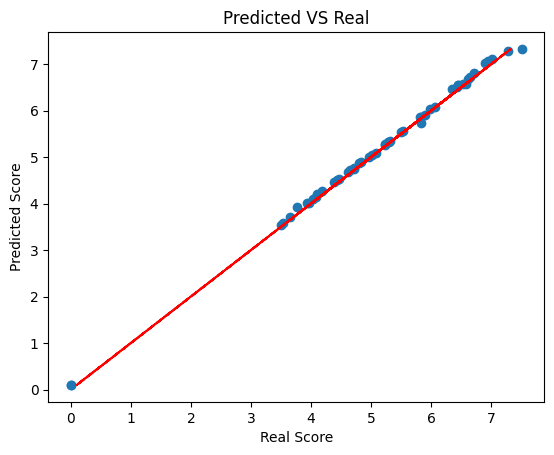

RANSAC


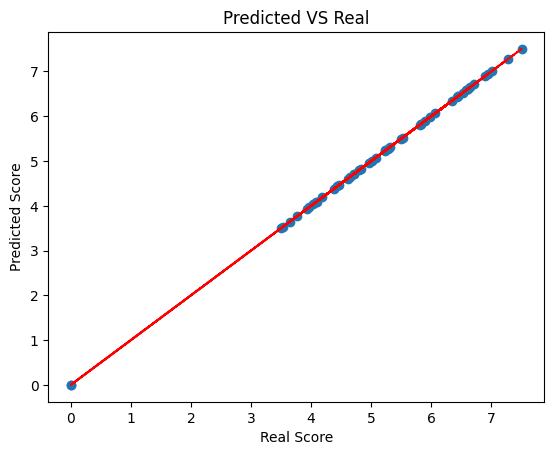

/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HUBER


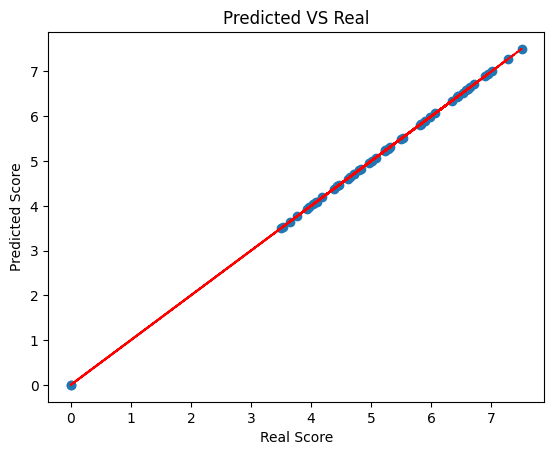

In [7]:
#gráficas

import matplotlib.pyplot as plt

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print("=" * 32)
    print(name)
    plt.ylabel('Predicted Score')
    plt.xlabel('Real Score')
    plt.title('Predicted VS Real')
    plt.scatter(y_test, predictions)
    plt.plot(predictions, predictions,'r--')
    plt.show()